# Tratamiento de datos con Pandas 🐼

## 00.Carga de datos (BigQuery Public Dataset program)

Comenzamos cargando los datos del [BigQuery Public Dataset Program](https://cloud.google.com/bigquery/public-data), para ello lo primero que haremos es autenticarnos en Google Cloud Platform. Puedes crear una cuenta gratuita con 300 USD (**activando** su cuenta), o puede solo registrarse. [aqui](https://console.cloud.google.com)

In [27]:
from google.colab import auth
auth.authenticate_user()
print('Autenticacion exitosa')

Autenticacion exitosa


Cargamos las librerias necesarias: bigquery, pandas y numpy

In [4]:
from google.cloud import bigquery
import pandas as pd
import numpy as np

Leemos los datos de BigQuery y los dejamos en un Dataframe de pandas

In [5]:
project_reader = "velascoluis-test" #Aqui tienes que cambiarlo por tu nombre de proyecto en GCP
project_public = "bigquery-public-data"
dataset_id = "catalonian_mobile_coverage_eu"
table_id = "mobile_data_2015_2017"
bq_client = bigquery.Client(project_reader)
dataset_ref = bigquery.DatasetReference(project_public, dataset_id)
table_ref = dataset_ref.table(table_id)
table = bq_client.get_table(table_ref)
df = bq_client.list_rows(table,max_results=100000).to_dataframe() #Leemos los primeros 100,000 registros
df.head()

,date,hour,lat,long,signal,network,operator,status,description,net,speed,satellites,precission,provider,activity,downloadSpeed,uploadSpeed,postal_code,town_name,position_geom
0,2016-02-22,21:01:29,41.21993,1.75448,0,yoigo,YOIGO,3,STATE_POWER_OFF,None,82.2,2.0,35.0,gps,IN_VEHICLE,None,None,None,None,POINT(1.75448 41.21993)
1,2016-02-22,06:31:35,41.24392,1.87257,3,yoigo,YOIGO,3,STATE_POWER_OFF,None,73.1,1.0,16.0,gps,IN_VEHICLE,None,None,None,None,POINT(1.87257 41.24392)
2,2016-02-22,15:15:19,41.27102,2.02823,10,yoigo,YOIGO,3,STATE_POWER_OFF,None,100.0,4.0,26.0,gps,IN_VEHICLE,None,None,080898,Gavà,POINT(2.02823 41.27102)
3,2016-02-22,06:53:59,41.33530,2.10246,4,yoigo,YOIGO,3,STATE_POWER_OFF,None,34.0,3.0,11.0,gps,IN_VEHICLE,None,None,081691,el Prat de Llobregat,POINT(2.10246 41.3353)
4,2016-02-22,17:56:01,41.23979,1.86027,7,yoigo,YOIGO,3,STATE_POWER_OFF,None,74.6,3.0,8.0,gps,IN_VEHICLE,None,None,082704,Sitges,POINT(1.86027 41.23979)


Describimos los datos a nivel estadistico

In [28]:
df.describe()

,lat,long,signal,status,speed,satellites,precission
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.157284,0.682763,13.51655,1.775490,24.522199,4.870640,58.088670
std,3.392317,9.852919,7.48710,0.636325,33.713067,3.826211,303.237498
min,-9.405610,-115.151690,0.00000,0.000000,0.000000,0.000000,0.000000
25%,41.385160,1.803968,8.00000,2.000000,1.300000,2.000000,10.000000
50%,41.491140,2.131445,13.00000,2.000000,6.700000,4.000000,17.000000
75%,41.689563,2.236403,18.00000,2.000000,35.900000,7.000000,30.000000
max,48.354450,121.578020,99.00000,3.000000,252.800000,24.000000,2753.000000


##  01.Deteccion de datos nulos e imputacion de **valores**

Vamos a buscar cuantos campos tienen algun valor nulo (NaN)

In [29]:
df.isnull().sum()

date                  0
hour                  0
lat                   0
long                  0
signal                0
network             338
operator            338
status                0
description           0
net                   0
speed                 0
satellites            0
precission            0
provider              0
activity              0
downloadSpeed    100000
uploadSpeed      100000
postal_code        8467
town_name          8467
position_geom         0
dtype: int64

Seleccionamos las filas concretas que tienen los valores NaN, por ejemplo network

In [30]:
fila_con_nan = df.isnull()['network']
filas_con_nan = df[fila_con_nan]
print(filas_con_nan)

             date      hour  ...               town_name            position_geom
42     2016-02-22  20:04:29  ...  Esplugues de Llobregat  POINT(2.08614 41.37022)
43     2016-02-22  20:06:29  ...  Esplugues de Llobregat  POINT(2.08539 41.37012)
1092   2016-02-22  07:41:56  ...             Bellaguarda  POINT(0.74629 41.34041)
15487  2015-12-05  08:45:50  ...       Vilallonga de Ter  POINT(2.31248 42.33092)
15488  2015-12-05  17:10:30  ...       Vilallonga de Ter  POINT(2.31239 42.33096)
...           ...       ...  ...                     ...                      ...
92982  2015-07-20  12:40:39  ...                Cubelles  POINT(1.67821 41.20151)
92983  2015-07-20  12:41:36  ...                Cubelles  POINT(1.67897 41.20102)
92984  2015-07-20  12:39:36  ...                Cubelles  POINT(1.67782 41.20166)
92985  2015-07-20  09:45:10  ...                Cubelles  POINT(1.67609 41.20255)
92986  2015-07-20  12:49:29  ...                Cubelles  POINT(1.67885 41.20084)

[338 rows x 20 

¿Que valor introducimos? Podemos poner el valor mas frecuente, la media, un cero ....
Para net vamos a poner por ejemplo el valor mas repetido, para ello pintamos un histograma

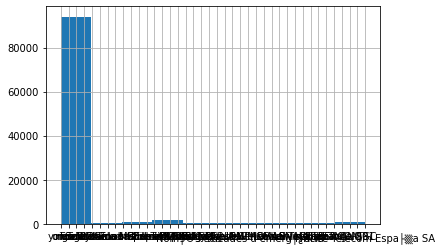

In [38]:
hist = df['network'].hist()

El valor mas repetido es 4G asi que introducimos ese valor en todas las ocurencias que estan a NaN

In [39]:
df['network'].fillna('yoigo', inplace=True)

Por ejemplo si fuese una variable continua, podemos imputar la media en los valores nulos con `df.fillna(df.mean())`

In [40]:
df.isnull().sum()

date                  0
hour                  0
lat                   0
long                  0
signal                0
network               0
operator            338
status                0
description           0
net                   0
speed                 0
satellites            0
precission            0
provider              0
activity              0
downloadSpeed    100000
uploadSpeed      100000
postal_code        8467
town_name          8467
position_geom         0
dtype: int64

## 02.Reformateo de datos

In [41]:
df

,date,hour,lat,long,signal,network,operator,status,description,net,speed,satellites,precission,provider,activity,downloadSpeed,uploadSpeed,postal_code,town_name,position_geom
0,2016-02-22,21:01:29,41.21993,1.75448,0,yoigo,YOIGO,3,STATE_POWER_OFF,4G,82.2,2.0,35.0,gps,IN_VEHICLE,None,None,None,None,POINT(1.75448 41.21993)
1,2016-02-22,06:31:35,41.24392,1.87257,3,yoigo,YOIGO,3,STATE_POWER_OFF,4G,73.1,1.0,16.0,gps,IN_VEHICLE,None,None,None,None,POINT(1.87257 41.24392)
2,2016-02-22,15:15:19,41.27102,2.02823,10,yoigo,YOIGO,3,STATE_POWER_OFF,4G,100.0,4.0,26.0,gps,IN_VEHICLE,None,None,080898,Gavà,POINT(2.02823 41.27102)
3,2016-02-22,06:53:59,41.33530,2.10246,4,yoigo,YOIGO,3,STATE_POWER_OFF,4G,34.0,3.0,11.0,gps,IN_VEHICLE,None,None,081691,el Prat de Llobregat,POINT(2.10246 41.3353)
4,2016-02-22,17:56:01,41.23979,1.86027,7,yoigo,YOIGO,3,STATE_POWER_OFF,4G,74.6,3.0,8.0,gps,IN_VEHICLE,None,None,082704,Sitges,POINT(1.86027 41.23979)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2015-07-20,18:52:37,41.38720,2.13133,6,vodafone,Vodafone ES,2,STATE_EMERGENCY_ONLY,4G,3.6,5.0,48.0,gps,ON_FOOT,None,None,080193,Barcelona,POINT(2.13133 41.3872)
99996,2015-07-20,18:51:14,41.38741,2.13038,6,vodafone,Vodafone ES,2,STATE_EMERGENCY_ONLY,4G,4.6,11.0,64.0,gps,ON_FOOT,None,None,080193,Barcelona,POINT(2.13038 41.38741)
99997,2015-07-20,19:57:42,41.38041,2.16373,18,vodafone,Vodafone ES,2,STATE_EMERGENCY_ONLY,4G,1.2,3.0,89.0,gps,ON_FOOT,None,None,080193,Barcelona,POINT(2.16373 41.38041)
99998,2015-07-20,21:17:46,41.38468,2.16385,17,vodafone,Vodafone ES,2,STATE_EMERGENCY_ONLY,4G,3.6,7.0,20.0,gps,ON_FOOT,None,None,080193,Barcelona,POINT(2.16385 41.38468)


Por ejemplo, vamos a cambiar el formato de las fechas, todo un clasico

In [42]:
columna_fecha = pd.to_datetime(df['date'])

In [43]:
columna_fecha

0       2016-02-22
1       2016-02-22
2       2016-02-22
3       2016-02-22
4       2016-02-22
           ...    
99995   2015-07-20
99996   2015-07-20
99997   2015-07-20
99998   2015-07-20
99999   2015-07-20
Name: date, Length: 100000, dtype: datetime64[ns]

Utilizamos la funcion `dt.strftime` para definir una nueva mascara de fechas

In [44]:
cambio_fecha_df = columna_fecha.dt.strftime("%m/%d/%y")

In [45]:
cambio_fecha_df

0        02/22/16
1        02/22/16
2        02/22/16
3        02/22/16
4        02/22/16
           ...   
99995    07/20/15
99996    07/20/15
99997    07/20/15
99998    07/20/15
99999    07/20/15
Name: date, Length: 100000, dtype: object

Otro clasico es cambiar los . por , o viceversa como separador de cifras

In [46]:
columna_lat = df['lat'].astype(str).str.replace('.', ',')

In [47]:
columna_lat

0        41,21993
1        41,24392
2        41,27102
3         41,3353
4        41,23979
           ...   
99995     41,3872
99996    41,38741
99997    41,38041
99998    41,38468
99999     41,3777
Name: lat, Length: 100000, dtype: object

## 03.Normalizacion, centrado y escalado

In [48]:
df

,date,hour,lat,long,signal,network,operator,status,description,net,speed,satellites,precission,provider,activity,downloadSpeed,uploadSpeed,postal_code,town_name,position_geom
0,2016-02-22,21:01:29,41.21993,1.75448,0,yoigo,YOIGO,3,STATE_POWER_OFF,4G,82.2,2.0,35.0,gps,IN_VEHICLE,None,None,None,None,POINT(1.75448 41.21993)
1,2016-02-22,06:31:35,41.24392,1.87257,3,yoigo,YOIGO,3,STATE_POWER_OFF,4G,73.1,1.0,16.0,gps,IN_VEHICLE,None,None,None,None,POINT(1.87257 41.24392)
2,2016-02-22,15:15:19,41.27102,2.02823,10,yoigo,YOIGO,3,STATE_POWER_OFF,4G,100.0,4.0,26.0,gps,IN_VEHICLE,None,None,080898,Gavà,POINT(2.02823 41.27102)
3,2016-02-22,06:53:59,41.33530,2.10246,4,yoigo,YOIGO,3,STATE_POWER_OFF,4G,34.0,3.0,11.0,gps,IN_VEHICLE,None,None,081691,el Prat de Llobregat,POINT(2.10246 41.3353)
4,2016-02-22,17:56:01,41.23979,1.86027,7,yoigo,YOIGO,3,STATE_POWER_OFF,4G,74.6,3.0,8.0,gps,IN_VEHICLE,None,None,082704,Sitges,POINT(1.86027 41.23979)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2015-07-20,18:52:37,41.38720,2.13133,6,vodafone,Vodafone ES,2,STATE_EMERGENCY_ONLY,4G,3.6,5.0,48.0,gps,ON_FOOT,None,None,080193,Barcelona,POINT(2.13133 41.3872)
99996,2015-07-20,18:51:14,41.38741,2.13038,6,vodafone,Vodafone ES,2,STATE_EMERGENCY_ONLY,4G,4.6,11.0,64.0,gps,ON_FOOT,None,None,080193,Barcelona,POINT(2.13038 41.38741)
99997,2015-07-20,19:57:42,41.38041,2.16373,18,vodafone,Vodafone ES,2,STATE_EMERGENCY_ONLY,4G,1.2,3.0,89.0,gps,ON_FOOT,None,None,080193,Barcelona,POINT(2.16373 41.38041)
99998,2015-07-20,21:17:46,41.38468,2.16385,17,vodafone,Vodafone ES,2,STATE_EMERGENCY_ONLY,4G,3.6,7.0,20.0,gps,ON_FOOT,None,None,080193,Barcelona,POINT(2.16385 41.38468)


Vamos a trabajar con las columnas speed, satellites y precision, aqui vamos a utilizar una funcion de sklearn para hacer este preprocesado. Hay muchas formas de escalar y estandarizar valores, en este caso vamos a utilizar una tecnica para dejar los valores entre -1 y 1. El framework sklearn tiene una buena [paleta de funciones](https://https://scikit-learn.org/stable/modules/preprocessing.html) para realizar preparacion de datos

In [49]:
from sklearn import preprocessing

columna_speed = df['speed'].values #Devuelve numpy
min_max_scaler = preprocessing.MinMaxScaler()
columna_speed_scaled = min_max_scaler.fit_transform(columna_speed.reshape(-1, 1))
columna_speed_scaled

array([[0.32515823],
       [0.28916139],
       [0.39556962],
       ...,
       [0.00474684],
       [0.01424051],
       [0.01424051]])

## 04.Integracion de datos

Vamos a genera un dataframe dummy para realizar un JOIN entre ellos, por ejemplo vamos a imaginar que tenemos datos con informacion (columnas A,B,C,D con datos aleatorios) de las compañias telefonicas

In [50]:
df_dummy = pd.DataFrame(np.random.randint(0,1000,size=(100, 4)), columns=list('ABCD'))

In [51]:
df_dummy['network'] = df['network'].sample(n=100).tolist()

In [52]:
df_dummy

,A,B,C,D,network
0,967,415,449,760,movistar
1,109,560,179,101,orange
2,463,437,243,824,movistar
3,328,623,716,597,movistar
4,877,429,959,169,vodafone
...,...,...,...,...,...
95,652,906,968,978,orange
96,885,735,751,421,movistar
97,308,593,903,833,movistar
98,199,549,26,752,movistar


Por ultimo, podemos realizar JOINs al estilo SQL con la funcion merge de pandas, en este caso vamos a realizar por ejemplo un INNER JOIN entre los dataframes df y df_dummy

In [53]:
df_joined = pd.merge(df, df_dummy, on='network', how='inner')

In [54]:
df_joined

,date,hour,lat,long,signal,network,operator,status,description,net,speed,satellites,precission,provider,activity,downloadSpeed,uploadSpeed,postal_code,town_name,position_geom,A,B,C,D
0,2016-02-22,21:01:29,41.21993,1.75448,0,yoigo,YOIGO,3,STATE_POWER_OFF,4G,82.2,2.0,35.0,gps,IN_VEHICLE,None,None,None,None,POINT(1.75448 41.21993),654,469,173,323
1,2016-02-22,21:01:29,41.21993,1.75448,0,yoigo,YOIGO,3,STATE_POWER_OFF,4G,82.2,2.0,35.0,gps,IN_VEHICLE,None,None,None,None,POINT(1.75448 41.21993),210,213,245,688
2,2016-02-22,21:01:29,41.21993,1.75448,0,yoigo,YOIGO,3,STATE_POWER_OFF,4G,82.2,2.0,35.0,gps,IN_VEHICLE,None,None,None,None,POINT(1.75448 41.21993),382,429,137,114
3,2016-02-22,21:01:29,41.21993,1.75448,0,yoigo,YOIGO,3,STATE_POWER_OFF,4G,82.2,2.0,35.0,gps,IN_VEHICLE,None,None,None,None,POINT(1.75448 41.21993),450,829,421,274
4,2016-02-22,06:31:35,41.24392,1.87257,3,yoigo,YOIGO,3,STATE_POWER_OFF,4G,73.1,1.0,16.0,gps,IN_VEHICLE,None,None,None,None,POINT(1.87257 41.24392),654,469,173,323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042955,2016-06-13,19:38:41,41.18696,1.57140,6,LlamaYA,LlamaYA,2,STATE_EMERGENCY_ONLY,3G,6.2,4.0,30.0,fused,TILTING,None,None,None,None,POINT(1.5714 41.18696),291,260,480,529
3042956,2017-01-15,14:12:47,41.18744,1.56900,12,LlamaYA,LlamaYA,0,STATE_IN_SERVICE,3G,0.0,1.0,96.0,gps,STILL,None,None,430379,Calafell,POINT(1.569 41.18744),291,260,480,529
3042957,2017-01-15,12:18:39,41.18743,1.56894,10,LlamaYA,LlamaYA,0,STATE_IN_SERVICE,3G,0.0,2.0,64.0,gps,TILTING,None,None,430379,Calafell,POINT(1.56894 41.18743),291,260,480,529
3042958,2017-01-15,12:52:47,41.18772,1.56882,12,LlamaYA,LlamaYA,0,STATE_IN_SERVICE,3G,0.0,3.0,128.0,gps,IN_VEHICLE,None,None,430379,Calafell,POINT(1.56882 41.18772),291,260,480,529


##  05.Discretizacion y 1-hot-encoding

Por ultimo, dos tecnicas muy usadas en la preparacion de features para nuestros modelos de ML son la discretizacion y el 1 hot encoding.
El 1 hot encoding intenta paliar el posible efecto adverso de convertir valores no numericos en una interpretaciion numerica: el 1 esta numericamente "mas cerca" del 2 que el 3.
Podemos utilizar la funcion get_dummiers de pandas

In [22]:
y = pd.get_dummies(df['activity'], prefix='1HotEnc')

In [23]:
y

,1HotEnc_IN_VEHICLE,1HotEnc_ON_BICYCLE,1HotEnc_ON_FOOT,1HotEnc_STILL,1HotEnc_TILTING,1HotEnc_UNKNOWN
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
99995,0,0,1,0,0,0
99996,0,0,1,0,0,0
99997,0,0,1,0,0,0
99998,0,0,1,0,0,0


Para generar una cuantizacion vamos primero a generar una columna dummy con una variable continua

In [55]:
df_dist = pd.DataFrame(np.random.randint(0,3456,size=(100, 1)), columns=list('A'))

In [56]:
df_dist

,A
0,2758
1,2479
2,3221
3,3162
4,2944
...,...
95,1300
96,1556
97,2387
98,3155


Y ahora podemos utilizar la funcion ´qcut´ de pandas para discretizar estos valores por ejemplo en 3 buckets

In [58]:
pd.qcut(df_dist.A, 3, labels=["Alto","Medio","Bajo"])

0      Bajo
1      Bajo
2      Bajo
3      Bajo
4      Bajo
      ...  
95    Medio
96    Medio
97     Bajo
98     Bajo
99     Alto
Name: A, Length: 100, dtype: category
Categories (3, object): [Alto < Medio < Bajo]

## One-hot en Pytorch

In [ ]:
import torch
x = torch.arange(0, 5)
print(x) #tensor([0, 1, 2, 3, 4])


In [ ]:
x_hot = torch.nn.functional.one_hot(x)
print(x_hot)